# HW02

Some exercises to get started with Python and lists, dicts and data in Python.

## Goals

- Gain experience with a popular scripting language used for ML/AI projects and research
- Get familiar with Python's notation for lists and objects
- Experiment with Python's unique functionalities for processing lists and objects
- Learn to load and process datasets using Python

### Setup

Run the following 2 cells to import all necessary libraries and helpers for Homework 02

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [2]:
import matplotlib.pyplot as plt

from HW02_utils import Tests
from data_utils import object_from_json_url

### Exercise 01:

Finding the sum of integer sequences.

Create a function ```sum_of_ints(i0, i1)``` that returns the sum of all integers between two integers.

For example, ```sum_of_ints(4, 32)``` should return $522$.


In [9]:
## Work on exercise 01 here

def sum_of_ints(i0, i1):
    if i0 > i1:
        i0, i1 = i1, i0
    return sum(range(i0, i1 + 1))

i0 = 4
i1 = 32

print(sum_of_ints(i0, i1))

522


### Exercise 01 testing:

Running the following cell will test the ```sum_of_ints()``` function on a small set of input pairs and report any combination that isn't computing correctly, if any.

In [10]:
# Test 01
Tests.test("01", sum_of_ints)



01: All tests passed 🎉🎉🎉


### Exercise 02:

Working with lists and dictionaries/objects.

Write a function `sum_objects(in_list)` that accept a list of objects and returns a sum according to the following specifications:

Each object in the list has 2 fields, `type` and `amount`, and so will look something like this:

```python
test_list = [
  { "type": "cost", "amount": 10.00 },
  { "type": "cost", "amount": 15.99 },
  { "type": "income", "amount": 150.25 },
  { "type": "income", "amount": 243.52 },
]
```

The `sum_objects(in_list)` function should iterate through all of the items in `in_list` and sum their `amount`s using positive values when `type` is `"income"`, and negative values when `type` is `"cost"`.

For example, passing the above list to the function should return $367.78$.

In [ ]:
# Implement 02 here


def sum_objects(in_list):
  total = 0
  for item in in_list:
    if item['type'] == 'income':
      total += item['amount']
    elif item['type'] == 'cost':
      total -= item['amount']
  return total


In [15]:
# Run this cell to test if function returns 367.78

test_list = [
  { "type": "cost", "amount": 10.00 },
  { "type": "cost", "amount": 15.99 },
  { "type": "income", "amount": 150.25 },
  { "type": "income", "amount": 243.52 },
]

print(f"Balance: ${sum_objects(test_list)}")

Balance: $367.78


#### Exercise 02 test:

Run the following cell to test the `sum_objects()` function.

In [17]:
# Test 02
Tests.test("02", sum_objects)

02: All tests passed 🎉🎉🎉


### Exercise 03:

Working with data files.

Find the name and population of the 3 cities that are geographically closest to the world's most populous city.

# 🤔😱


#### Load Data:

Let's break this down into a few sub-problems.

First, let's load a JSON file that has information about large cities in the world.

The file at this [URL](https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/cities50k.json) has a list of cities formatted like this:

```py
{
  "name": "Pittsburgh",
  "country": "US",
  "admin1": "Pennsylvania",
  "lat": 40.4406200,
  "lon": -79.9958900,
  "pop": 304391
}
```

This is just like how we loaded ANSUR data files in class:

In [3]:
# Define the location of the json file here
CITIES_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/cities50k.json"

# Use the object_from_json_url() function to load contents from 
# the json file into a Python object called "info_cities"

info_cities = object_from_json_url(CITIES_FILE)

#### Exercise 03A:

Ok. We should now have a list of objects with information about cities.

Explore the data and answer the following questions:
- How many cities are in this list?
- What's the name of the first city on the list?
- What are the latitude and longitude of the last city on the list?
- What are the populations for the largest and smallest cities?
- What's the name of the city with the largest population?


In [4]:
# Work on 03A here

# How many cities are in the list?

num_cities = len(info_cities)
print("No. of cities:", num_cities)

# What's the name of the first city on the list?

first_city = info_cities[0]['name']
print(first_city)

# What are the latitude and longitude of the last city on the list?

last_latitude = info_cities[-1]['lat']
last_longitude = info_cities[-1]['lon']
print('Last lat:', last_latitude, ',', 'Last lon:', last_longitude)

# What are the populations for the largest and smallest cities?

largest_population = sorted(info_cities, key=lambda x: x['pop'], reverse=True)[0]['pop']
smallest_population = sorted(info_cities, key=lambda x: x['pop'])[0]['pop']
print('Largest pop:', largest_population, ',', 'Smallest pop:', smallest_population)

# What's the name of the city with the largest population?

largest_city_name = sorted(info_cities, key=lambda x: x['pop'], reverse=True)[0]['name']
print('Largest city by pop:', largest_city_name)

No. of cities: 8670
Abu Dhabi
Last lat: -17.88333 , Last lon: 30.7
Largest pop: 22315474 , Smallest pop: 50011
Largest city by pop: Shanghai


#### Test 03A

In [41]:
# Test 03A
answers = [num_cities, first_city, last_latitude, last_longitude, largest_population, smallest_population, largest_city_name]

Tests.test("03A", answers)

03A: All tests passed 🎉🎉🎉


#### Exercise 03B:

We have the largest city's name and population, but we need its position.

We can recycle some of the logic from above to get the whole object that contains information for the largest city.

In [5]:
# Work on 03B here

# Find index of SH
largest_city_i, largest_city = max(enumerate(info_cities), key=lambda x: x[1]['pop'])
print(largest_city_i, '.', largest_city_name)

1560 . Shanghai


In [64]:
# Test 03B
Tests.test("03B", largest_city)

03B: All tests passed 🎉🎉🎉


#### Exercise 03C:

We should have all info about the largest city here.

Now, we'll iterate through the list and use each city's latitude and longitude to calculate its distance from the largest city.

Althought not $100\%$ correct, it's ok to use the [2D Euclidean distances](https://en.wikipedia.org/wiki/Euclidean_distance#Two_dimensions) for this.

Could be useful to define a function `distance(cityA, cityB)` that returns the distance between two cities.

In [6]:
# Work on 03C here

# Implement the helper function for calculating distances between 2 cities

def distance(cityA, cityB):
    lat1 = cityA['lat']
    lon1 = cityA['lon']
    lat2 = cityB['lat']
    lon2 = cityB['lon']
    return ((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2) ** 0.5


In [66]:
# Test 03C
Tests.test("03C", distance)

03C: All tests passed 🎉🎉🎉


#### Exercise 03D:

Ok. We implemented a function to calculate the distance between 2 cities, let's use it now.

Iterate through the list of cities again, calculate the distance from each city to the largest city, and add that as a new feature/key to each city's entry:

```py
{
  "name": "Pittsburgh",
  "country": "US",
  "admin1": "Pennsylvania",
  "lat": 40.4406200,
  "lon": -79.9958900,
  "pop": 304391,
  "distance": 1222.32
}
```

Just make sure the key that holds the distance value is called `distance`.

In [ ]:
# Work on 03D here

# Now calculate every city's distance from the largest city and
latSH = largest_city['lat']
lonSH = largest_city['lon']

def distanceSH(largest_city, cityB):
    latSH = largest_city['lat']
    lonSH = largest_city['lon']
    lat2 = cityB['lat']
    lon2 = cityB['lon']
    return ((latSH - lat2) ** 2 + (lonSH - lon2) ** 2) ** 0.5


distance = []

for city in info_cities:
    city['distance'] = round(distanceSH(largest_city, city) * 100, 2)  # Convert to km and 2 decimal places

    # Add that info to each city's entry or save that on a new list
    distance.append({
        'name': city['name'],
        'distance': city['distance'],
    })

# with their name and pop

for city in info_cities:
    if 'pop' in city:
        print(city['name'],',', 'Population:', city['pop'],',', 'Distance', city['distance'])



Abu Dhabi , Population: 603492 , Distance 6740.21
Ajman City , Population: 490035 , Distance 6623.55
Al Ain City , Population: 55091 , Distance 6607.26
Al Fujairah City , Population: 86512 , Distance 6540.23
Al Shamkhah City , Population: 61710 , Distance 6709.87
Bani Yas City , Population: 80498 , Distance 6718.52
Dubai , Population: 2956587 , Distance 6643.36
Khalifah A City , Population: 85374 , Distance 6719.76
Musaffah , Population: 243341 , Distance 6732.61
Ras Al Khaimah City , Population: 351943 , Distance 6573.97
Reef Al Fujairah City , Population: 82310 , Distance 6549.3
Sharjah , Population: 1324473 , Distance 6630.77
Umm Al Quwain City , Population: 62747 , Distance 6614.53
Zayed City , Population: 63482 , Distance 6817.42
Baghlān , Population: 108449 , Distance 5297.76
Balkh , Population: 114883 , Distance 5484.08
Bāmyān , Population: 61863 , Distance 5375.14
Bāzārak , Population: 65000 , Distance 5210.37
Charikar , Population: 53676 , Distance 5242.39
Gardez , Population:

In [46]:
# Test 03D
Tests.test("03D", distance)

# OR
Tests.test("03D", info_cities)

ERROR City object {'name': 'Liverpool', 'distance': 12639.87} is missing the 'pop' field
ERROR City object {'name': 'Westonaria', 'distance': 11005.1} is missing the 'pop' field
ERROR City object {'name': 'Hepo', 'distance': 961.16} is missing the 'pop' field
ERROR City object {'name': 'Neuss', 'distance': 11649.84} is missing the 'pop' field
ERROR City object {'name': 'Osmanabad', 'distance': 4725.42} is missing the 'pop' field
ERROR City object {'name': 'Isparta', 'distance': 9114.09} is missing the 'pop' field
ERROR City object {'name': 'Moga', 'distance': 4629.11} is missing the 'pop' field
ERROR City object {'name': 'Juba', 'distance': 9366.44} is missing the 'pop' field
ERROR City object {'name': 'Cottbus', 'distance': 10907.96} is missing the 'pop' field
ERROR City object {'name': 'Ksar El Kebir', 'distance': 12741.79} is missing the 'pop' field
ERROR City object {'name': 'Thrissur', 'distance': 4975.44} is missing the 'pop' field
ERROR City object {'name': 'Pilar', 'distance': 

#### Exercise 03E:

Now, sort the array from the previous step by distance and get the name and population of the $3$ cities closest to the largest city, but not including the largest city. In other words, if you sort the list from the exercise above by ascending `distance`, the $3$ cities closest to the largest city will be in the slice `[1:4]`. The city at index $0$ is the city with the largest population, and should have a distance of $0$ from itself.

The answer should be an object where its keys are city names and values are populations.

Something like:

```python
closest_3 = {
  "pittsburgh": 23412,
  "liverpool": 172821,
  "oakland": 182726
}
```

We saw how to sort lists of objects in lecture.

In [60]:
# Work on 03E here

# Sort the array and get the name and population of the 3 cities closest to the largest city

cities_by_distance = sorted(info_cities, key=lambda x: x['distance'])

closest_3 = {}

for city in cities_by_distance[1:4]:
	closest_3[city['name']] = city['pop']

print(closest_3)



{'Songjiang': 130218, 'Zhujiajiao': 60000, 'Kunshan': 1600000}


In [61]:
# Test 03F
Tests.test("03E", closest_3)

03E: All tests passed 🎉🎉🎉


### Exercise 04:

Visualizing data files.


#### Loading The Data:

Let's load a JSON file that has information about houses in the Los Angeles metropolitan region of California.

The file at this [url](https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/LA_housing.json) has a list of objects formatted like this:

```python
{
  "longitude": -114.310,
  "latitude": 34.190,
  "age": 15,
  "rooms": 12.234,
  "bedrooms": 3.514,
  "value": 669000
}
```

The number of rooms and bedrooms are not integers because some addresses have multiple units/apartments with different floorplans that get averaged.

In [47]:
# Define the location of the json file
HOUSES_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/LA_housing.json"

# Use the object_from_json_url() function to load
# the json file into a Python object called "info_houses"

info_houses = object_from_json_url(HOUSES_FILE)

#### Exercise 04A:

Explore the data and answer the following questions:
- How many instances are there in our dataset?
- What's the value of the most expensive house?
- What's the max number of bedrooms in a house?
- What's the number of bedrooms in the house with the most rooms?
- What's the number of rooms in the house with the most bedrooms?

In [71]:
# Work on 04A here

# How many instances are there in our dataset?
info_houses_ins = len(info_houses)
print('no. of instances:', info_houses_ins)

# This is the same as asking "how many rows" or, in this case, "how many houses"

num_houses = info_houses_ins
print('no. of houses:', num_houses)

# What's the value of the most expensive house?

max_value = max(info_houses, key=lambda x: x['value'])['value']
print('Most Expensive: $', max_value)


# What's the number of bedrooms in the house with the most bedrooms?

most_bedrooms = max(info_houses, key=lambda x: x['bedrooms'])['bedrooms']
print('No. of Bedrooms of House w/ Most Bedrooms:', most_bedrooms)


# What's the number of bedrooms in the house with the most rooms?

bedrooms_in_most_rooms = max(info_houses, key=lambda x: x['rooms'])['bedrooms']
print('No. of Bedroom of House Most Rooms:', bedrooms_in_most_rooms)

# What's the number of rooms in the house with the most bedrooms?

rooms_in_most_bedrooms = max(info_houses, key=lambda x: x['bedrooms'])['rooms']
print('No. Room in House w/ Most Bedrooms:', rooms_in_most_bedrooms)



no. of instances: 5779
no. of houses: 5779
Most Expensive: $ 5497503
No. of Bedrooms of House w/ Most Bedrooms: 1.9259259259259258
No. of Bedroom of House Most Rooms: 1.75
No. Room in House w/ Most Bedrooms: 2.1481481481481484


In [72]:
# Test 04A
answers = [num_houses, max_value, most_bedrooms, bedrooms_in_most_rooms, rooms_in_most_bedrooms]

Tests.test("04A", answers)

04A: All tests passed 🎉🎉🎉


#### Exercise 04B:

Which of the features (`longitude`, `latitude`, `age`, `rooms` or `bedrooms`) is a better indicator for value of a house?

We're going to use XY scatter plots to visualize house value as a function of each of these features, and see if any of them show strong correlation.

Documentation for the plotting library is here:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

One thing to note is that the functions for plotting like to get lists of values and not lists of objects.

Before we plot anything, let's define a function `list_from_key(objs, key)` that returns a list with all values of feature `key` for all of the objects in `objs`.

In [73]:
# Work on 04B here

# helper function to get lists of values from specific key
def list_from_key(objs, key):
  # TODO: implement the list_from_key functionality
    return [obj[key] for obj in objs]


In [74]:
# Test 04B
Tests.test("04B", list_from_key)

04B: All tests passed 🎉🎉🎉


#### Exercise 04C:

Now we can actually plot some values and start looking for correlations.

Pick a feature and make a graph that shows house prices as a function of that feature.

You can also write a for loop to plot graphs for all features.

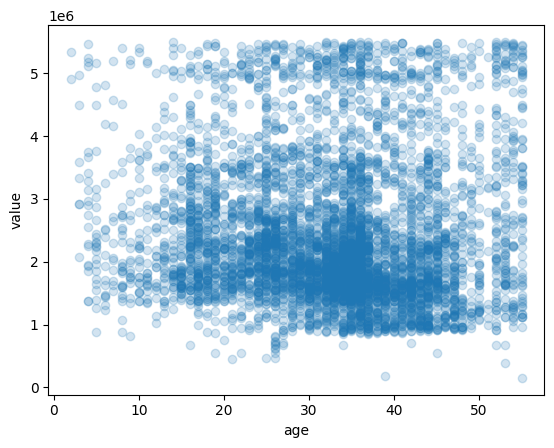

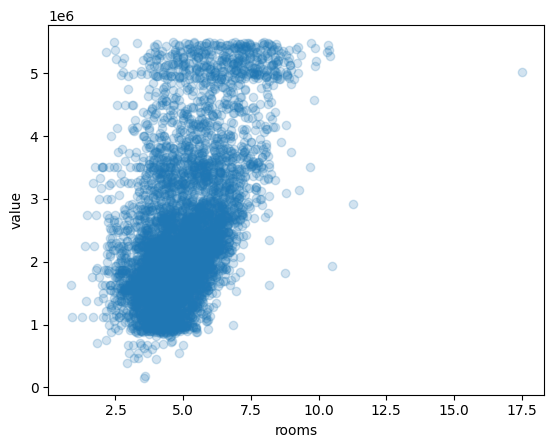

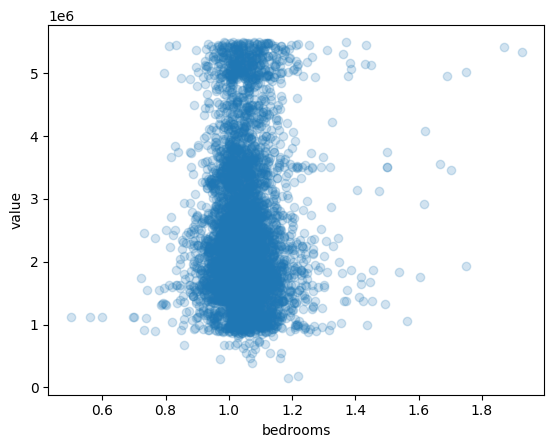

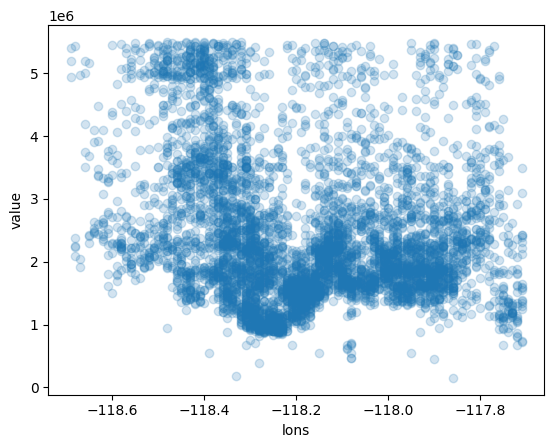

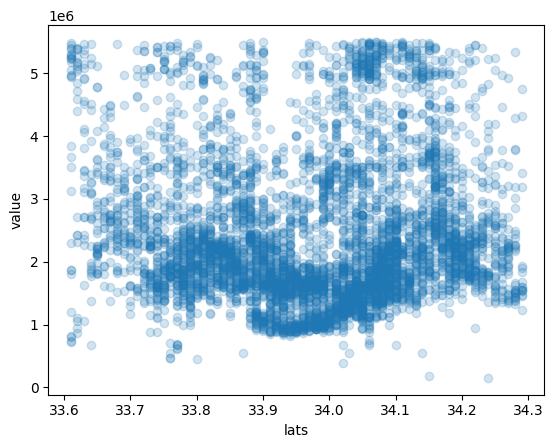

In [88]:
# Work on 04C here

# TODO: get a list with all of the price values
prices = list_from_key(info_houses, 'value')
#print(prices)

# TODO: get a list with all of the house ages (for example)
house_ages = []
for house in info_houses:
    house_ages.append(house['age'])

rooms = list_from_key(info_houses, 'rooms')
#print(rooms)

bedrooms = list_from_key(info_houses, 'bedrooms')
##print(bedrooms)

lons = list_from_key(info_houses, 'longitude')

lats = list_from_key(info_houses, 'latitude')

# this is the command to plot a XY scatter plot from 2 lists
# see documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

plt.scatter(house_ages, prices, alpha=0.2)
plt.xlabel("age")
plt.ylabel("value")
plt.show()


plt.scatter(rooms, prices, alpha=0.2)
plt.xlabel("rooms")
plt.ylabel("value")
plt.show()

plt.scatter(bedrooms, prices, alpha=0.2)
plt.xlabel("bedrooms")
plt.ylabel("value")
plt.show()

plt.scatter(lons, prices, alpha=0.2)
plt.xlabel("lons")
plt.ylabel("value")
plt.show()

plt.scatter(lats, prices, alpha=0.2)
plt.xlabel("lats")
plt.ylabel("value")
plt.show()



#### What are some features that correlate with price ?

A positive correlation between no. of rooms and value of the house.

#### Foreshadowing:

What if we use two features at a time?

Is there a pair of features (`longitude`, `latitude`, `age`, `rooms` or `bedrooms`) that correlates to house value?

We could look at the relationship between `price`, `age` and `rooms`:

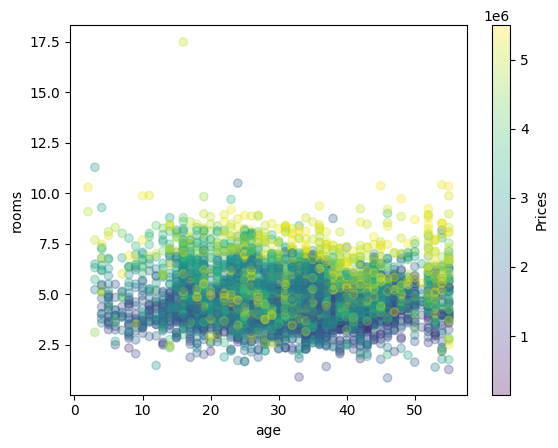

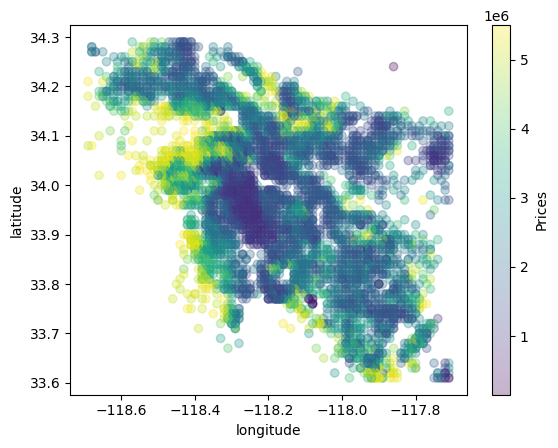

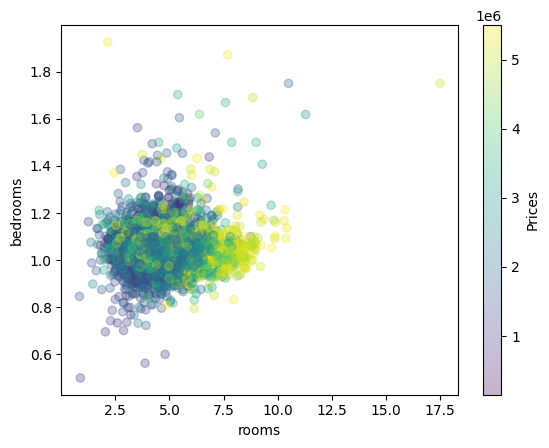

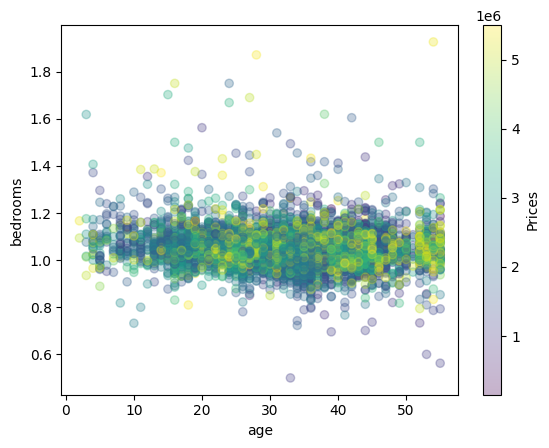

In [95]:
# get a list with all of the price values
prices = list_from_key(info_houses, "value")

# get a list with all of the values of one feature
feature_0_values = list_from_key(info_houses, "age")

# get a list with all of the values of another feature
feature_1_values = list_from_key(info_houses, "rooms")

feature_2_values = list_from_key(info_houses, "bedrooms")

feature_3_values = list_from_key(info_houses, "longitude")

feature_4_values = list_from_key(info_houses, "latitude")


# this is how we plot an XY scatter plot using 3 lists
# see documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

scatter = plt.scatter(feature_0_values, feature_1_values, c=prices, alpha=0.3)
plt.xlabel("age")
plt.ylabel("rooms")
plt.colorbar(scatter, label='Prices')
plt.show()


scatter = plt.scatter(feature_3_values, feature_4_values, c=prices, alpha=0.3) #A negative correlation between lon/lat and value of the house.
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(scatter, label='Prices')
plt.show()

scatter = plt.scatter(feature_1_values, feature_2_values, c=prices, alpha=0.3)
plt.xlabel("rooms")
plt.ylabel("bedrooms")
plt.colorbar(scatter, label='Prices')
plt.show()

scatter = plt.scatter(feature_0_values, feature_2_values, c=prices, alpha=0.3)
plt.xlabel("age")
plt.ylabel("bedrooms")
plt.colorbar(scatter, label='Prices')
plt.show()

Or, we could write a little for loop to plot all possible pairs of features:

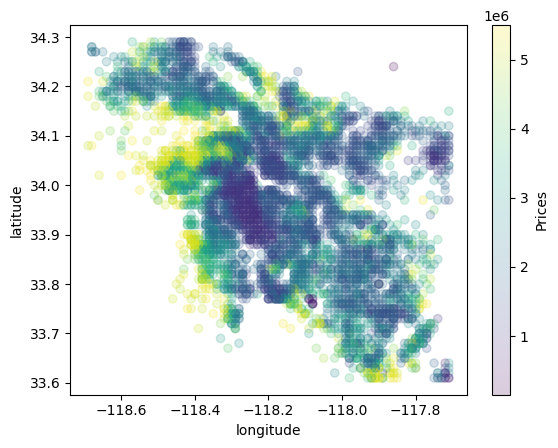

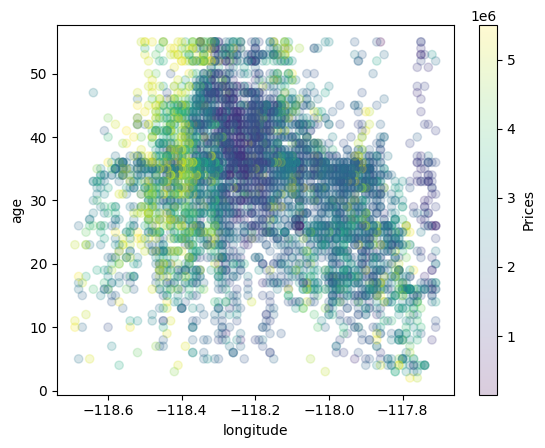

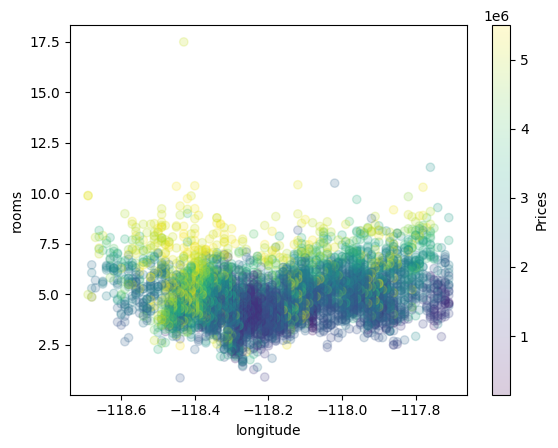

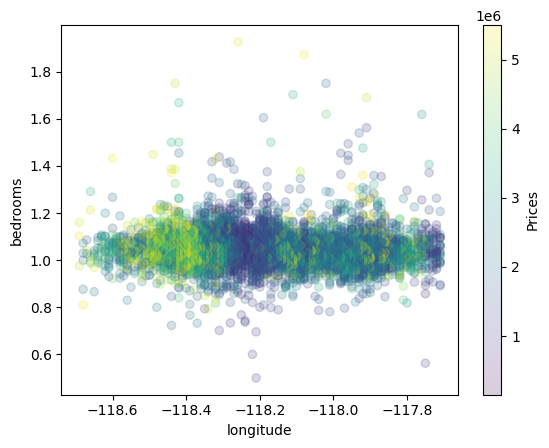

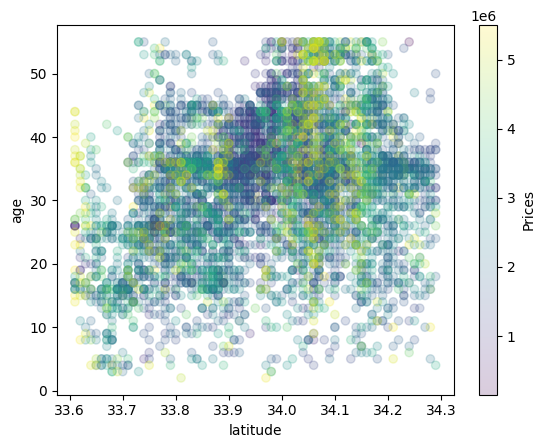

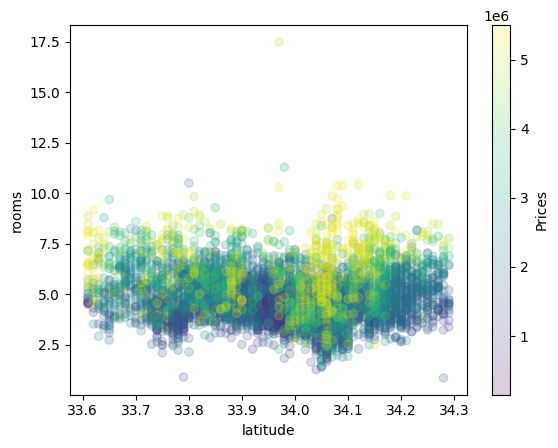

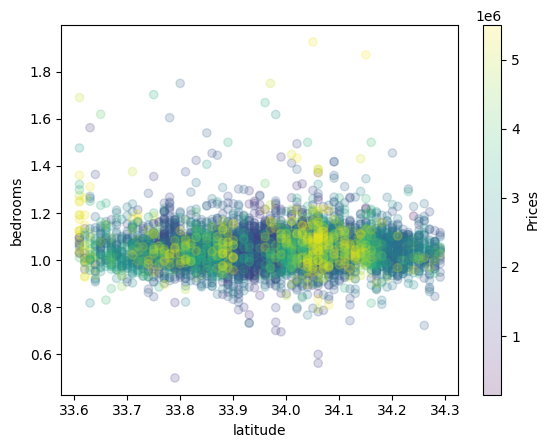

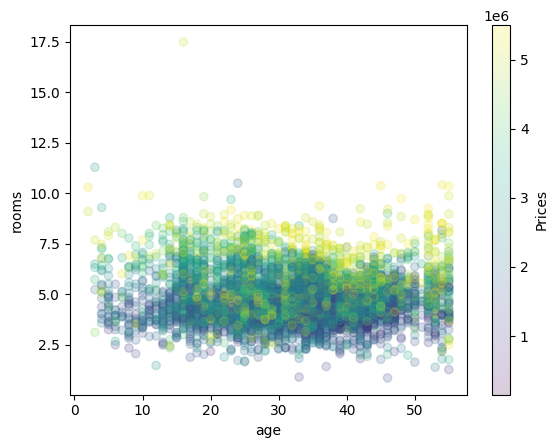

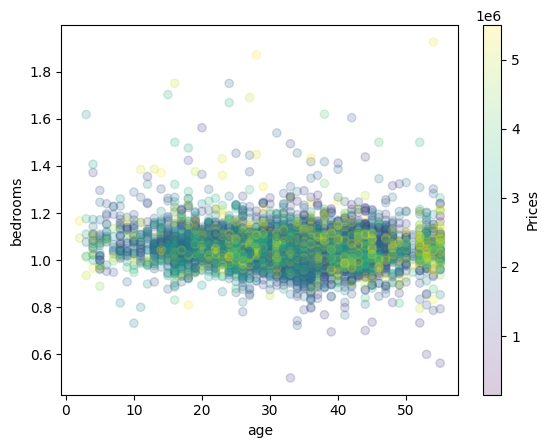

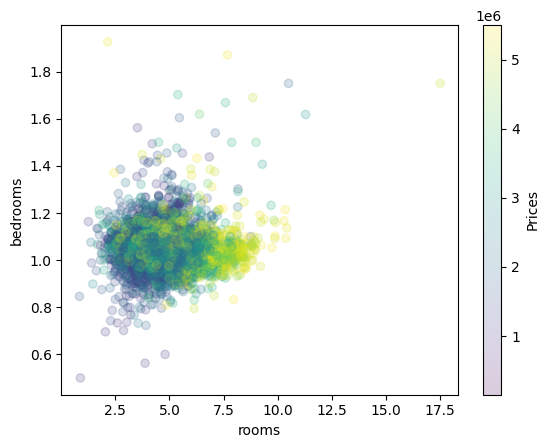

In [101]:
# to plot all feature pairs
# get list of all features
features = info_houses[0].keys()
prices = list_from_key(info_houses, "value")

# get all pairs of features
for idx_0, feature_0 in enumerate(features):
  x = list_from_key(info_houses, feature_0)
  for idx_1, feature_1 in enumerate(features):
    y = list_from_key(info_houses, feature_1)
    # skip repeated features
    if feature_0 != "value" and feature_1 != "value" and idx_1 > idx_0:
      scatter = plt.scatter(x, y, c=prices, alpha=0.2)
      plt.xlabel(feature_0)
      plt.ylabel(feature_1)
      plt.colorbar(scatter, label='Prices')
      plt.show()